In [1]:
from src import *

In [2]:
encoder = SimpleHexEncoder(padding=0)
actor1 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='test_4_4sim/0.h5'
             )
critic1 = Critic(learning_rate=0.01,
             nn_loss = 'mse',
              encoder=encoder,
               load_from='test_4_4sim/_critic_0.h5'
             )

encoder = DemoEncoder()
actor2 = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='test_4_4sim/10.h5'
             )

critic2 = Critic(learning_rate=0.01,
             nn_loss = 'mse',
              encoder=encoder,
               load_from='test_4_4sim/_critic_10.h5'
             )

agent1 = Agent(actor1, critic1)
agent2 = Agent(actor2, critic2)

In [3]:
hex = Hex((4,4))
encoder = SimpleHexEncoder(padding=0)
hex.set_encoder(encoder)

In [15]:
hex = Hex((4,4))
encoder = HexEncoder(padding=2)
hex.set_encoder(encoder)

actor = Actor(learning_rate=0.001,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='test4_4/10.h5'
             )


#agent1 = Agent(actor1)
agent1 = Agent(actor)

In [16]:
actor = Actor(learning_rate=0.001,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='test4_4/0.h5'
             )


#agent1 = Agent(actor1)
agent2 = Agent(actor)

In [11]:
e = Hex((4,4))

actor1.get_action(e)

(0, 3)

In [7]:
actor2.get_action(e)

ValueError: Input 0 of layer sequential_8 is incompatible with the layer: expected axis -1 of input shape to have value 32 but received input with shape (1, 4, 4, 4)

In [4]:
topp = Topp(agents=[agent1, agent2], env=hex, number_of_games=100)

In [5]:
topp.topp()

{<src.agent.Agent at 0x13655f220>: 50, <src.agent.Agent at 0x136575f10>: 50}

In [20]:
with open('test_4_4dem/replay_buffer_6_6.pkl','rb') as f:
    replay = pickle.load(f)
    

In [21]:
len(replay)

103

In [23]:
replay[:12]

[(<src.hex.Hex at 0x144ab69d0>,
  {(1, 0): 0.01,
   (2, 0): 0.01,
   (0, 2): 0.01,
   (3, 0): 0.03,
   (2, 3): 0.01,
   (1, 2): 0.01,
   (1, 3): 0.15,
   (2, 1): 0.32,
   (3, 1): 0.01,
   (1, 1): 0.01,
   (0, 1): 0.01,
   (3, 2): 0.01,
   (0, 0): 0.03,
   (3, 3): 0.01,
   (0, 3): 0.14,
   (2, 2): 0.23},
  1),
 (<src.hex.Hex at 0x145256eb0>,
  {(2, 3): 0.06557377049180328,
   (2, 1): 0.19672131147540983,
   (3, 1): 0.01639344262295082,
   (0, 0): 0.01639344262295082,
   (0, 1): 0.01639344262295082,
   (0, 2): 0.09836065573770492,
   (1, 3): 0.22950819672131148,
   (0, 3): 0.0819672131147541,
   (1, 1): 0.00819672131147541,
   (1, 2): 0.00819672131147541,
   (3, 0): 0.03278688524590164,
   (3, 3): 0.00819672131147541,
   (2, 0): 0.20491803278688525,
   (3, 2): 0.00819672131147541,
   (1, 0): 0.00819672131147541},
  0),
 (<src.hex.Hex at 0x1453af490>,
  {(1, 2): 0.15748031496062992,
   (1, 0): 0.007874015748031496,
   (2, 3): 0.25196850393700787,
   (3, 1): 0.007874015748031496,
   (3, 3)

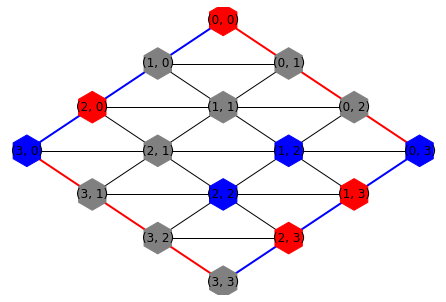

In [28]:
replay[8][0].display_board()

In [29]:
replay[8][1]

{(2, 1): 0.2520325203252033,
 (0, 2): 0.008130081300813009,
 (3, 2): 0.008130081300813009,
 (3, 3): 0.10569105691056911,
 (0, 1): 0.008130081300813009,
 (1, 0): 0.15447154471544716,
 (3, 1): 0.2520325203252033,
 (1, 1): 0.21138211382113822}

In [52]:
critic = Critic(learning_rate=0.001,
             epsilon=0,
             end_epsilon=0,
             nn_shape=(32,256,128,1),
             filters=(),
             kernel_sizes=(),
                nn_opt='SGD',
              nn_activation='relu',
              nn_last_activation='sigmoid',
              nn_loss= 'mse',
              encoder=encoder
             )
critic.end_of_episode(replay[:9], epochs=10)

first replay:  3
Epoch 1/10
1/1 [==============================] - 0s 390ms/step - loss: 0.2591 - accuracy: 0.4444
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2590 - accuracy: 0.5556
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2590 - accuracy: 0.5556
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2589 - accuracy: 0.5556
Epoch 5/10
1/1 [==============================] - 0s 35ms/step - loss: 0.2589 - accuracy: 0.5556
Epoch 6/10
1/1 [==============================] - 0s 34ms/step - loss: 0.2588 - accuracy: 0.5556
Epoch 7/10
1/1 [==============================] - 0s 30ms/step - loss: 0.2587 - accuracy: 0.5556
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 0.2587 - accuracy: 0.5556
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2586 - accuracy: 0.5556
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2586 - accuracy: 0.5556


In [35]:
replay[0][0].encoder.get_encoding()

<tf.Tensor: shape=(1, 32), dtype=int64, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>